In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


set_config(print_changed_only=False)

In [55]:
df = pd.read_csv('../data/Iris.csv')
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### prepare data

In [56]:
sizes = df['Species'].value_counts()
sizes

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### check for missing data

In [57]:
df.isnull().sum()
# df.dropna()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### create numerical classes

In [58]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [59]:
le = LabelEncoder()

df['class'] = le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [60]:
df.drop('Species', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### divide data into `features` and `classes`

In [61]:
# row column
x = df.iloc[:, 0:4]
y = df.iloc[:, -1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### separate into training and test data

In [62]:
x_train, x_test, y_train, y_test = train_test_split(
    x.values,
    y.values,
    test_size=0.33,
    shuffle=True,
    random_state=42,
)

In [63]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (100, 4)
y_train: (100,)
x_test: (50, 4)
y_test: (50,)


## build a custom random forest model

In [64]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_features=3,
)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### check performance

In [65]:
y_pred_test = model.predict(x_test)

In [66]:
y_pred_train = model.predict(x_train)
print(f'accuracy of train data: {accuracy_score(y_train, y_pred_train)}')
print(f'accuracy of test data: {accuracy_score(y_test, y_pred_test)}')
print(' simpler '.center(79, '='))
print(f'accuracy of test data: {model.score(x_train, y_train)}')
print(f'accuracy of test data: {model.score(x_test, y_test)}')

accuracy of train data: 1.0
accuracy of test data: 0.98
=================================== simpler ===================================
accuracy of test data: 1.0
accuracy of test data: 0.98


Text(33.22222222222222, 0.5, 'Truth')

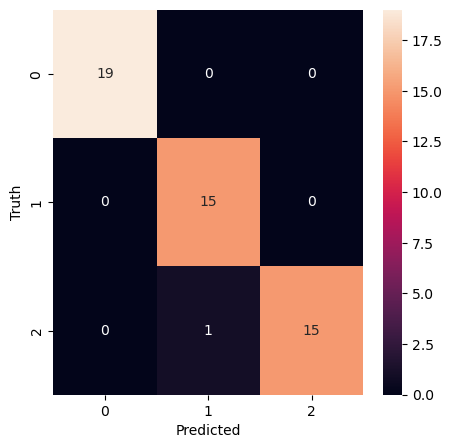

In [67]:
y_pred_test = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### feature importance

In [68]:
feature_list = x.columns.to_list()
feature_importance = pd.Series(
    model.feature_importances_,
    index=feature_list,
).sort_values(ascending=False)
feature_importance

PetalWidthCm     0.487084
PetalLengthCm    0.472472
SepalWidthCm     0.020243
SepalLengthCm    0.020201
dtype: float64